In [6]:
import sys
import os
import glob
from mpi4py import MPI
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'

import floatpy.readers.padeops_reader as por
import floatpy.readers.parallel_reader as pdr
import floatpy.utilities.reduction as red
import floatpy.derivatives.compact.compact_derivative as cd
import scripts.statistics as stats
import scripts.get_namelist as nml
from scripts.common import *


def get_cbar(directory,inp,flist,y): #flist is lscales
    mat = np.zeros([len(flist),5])

    for i,fname in enumerate(flist):
        tID = fname.split('_')[-1]
        tID = int(tID.split('.dat')[0])
        time = nml.read_time(directory,tID)

        # Get y lengthscale and corresponding idx
        cbar = np.fromfile(fname,sep=' ')
        #plt.plot(cbar)
        mat[i,0] = time
        mat[i,1] = np.amax(cbar)
        
    isort = np.argsort(mat[:,0]) #sort time
    return mat[isort,:]

directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/'
inp = nml.inputs(directory,verbose=True)
Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=True)
Ny = int(Ny)
x = np.linspace(0,Lx,Nx)
z = np.linspace(0,Lz,Nz)
y = np.linspace(-Ly/2.,Ly/2.,Ny)

# And read growth rates
tlist,dlist,rates = growth_rates(directory+'shearlayer_')

dir_out = directory.split('/projects/ShockInducedMix/')[-1]
dir_out = '/home/kmatsuno/' + dir_out + '/'
print(dir_out)
flist = glob.glob(dir_out+"*cbar*")
flist.sort()
print([f.split('/')[-1] for f in flist])


Params for this run:
	Mc = 2.0
	Re = 1000.0
	rr = 1.0
Params for this grid:
	N = 1024x1448x512
	L = 80.0x80.0x40.0
/home/kmatsuno/ShearLayerData/production/Mc20/rr1/1024x1448x512//
['shearlayer_cbar_0001.dat', 'shearlayer_cbar_0002.dat', 'shearlayer_cbar_0003.dat', 'shearlayer_cbar_0004.dat', 'shearlayer_cbar_0005.dat', 'shearlayer_cbar_0006.dat', 'shearlayer_cbar_0007.dat', 'shearlayer_cbar_0008.dat', 'shearlayer_cbar_0009.dat', 'shearlayer_cbar_0010.dat', 'shearlayer_cbar_0011.dat', 'shearlayer_cbar_0012.dat', 'shearlayer_cbar_0013.dat']


2.0:[1.39069639966,0.0388785610876],


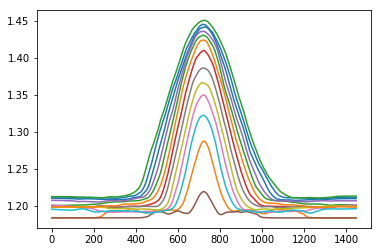

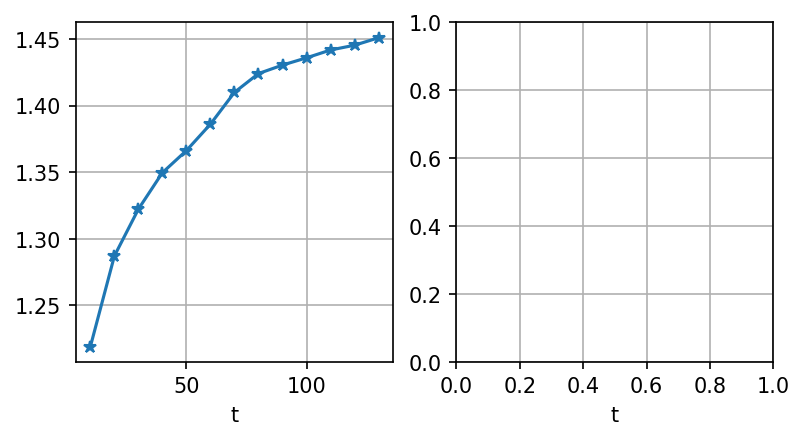

In [5]:
flist = glob.glob(dir_out+"*cbar*")

dat = get_cbar(directory,inp,flist[0:],y)
fig,ax = plt.subplots(1,2,figsize=(6,3),dpi=150)
ax[0].plot(dat[:,0],dat[:,1],'-*')
# ax[1].plot(dat[:,0],dat[:,3]/dat[:,4],'-*')

for a in ax:
    a.grid(True)
    a.set_xlabel('t')

idx = 2
ie = -3
istat = 1 #1: du/du, 2:du*ly
print('{}:[{},{}],'.format(inp.Mc,np.mean(dat[idx:ie,istat]),np.std(dat[idx:ie,istat])))


0.2:[1.18517213417,8.28316005859e-05],
0.4:[1.18993010216,0.00216046672833],
0.8:[1.21488040218,0.000434722017994],
1.2:[1.26528497121,0.00169770428284],
1.6:[1.3438352086,0.00140748190739],
2.0:[1.44367494524,0.00179705361569],
Done


Text(0.5,0,'$t\\Delta U$')

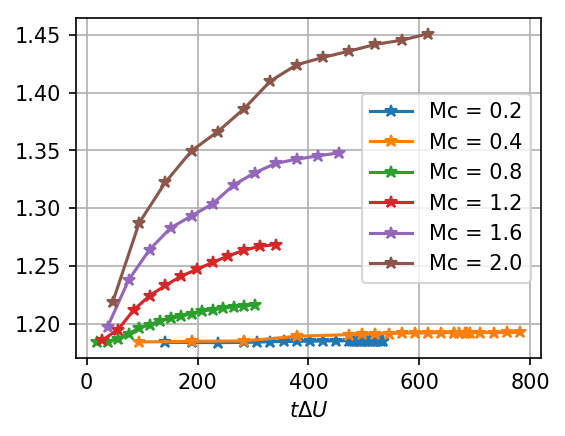

In [13]:
s = '1'

if s=='1': Mc_list = ['02','04','08','12','16','20']
else: Mc_list = ['02','08','20']
    
fig = plt.figure(figsize=(4,3),dpi=150)
ax = plt.axes()

for Mc in Mc_list:
    directory = '/home/kmatsuno/ShearLayerData/production/Mc%s/rr%s/1024x1448x512/'%(Mc,s)
    inp = nml.inputs(directory,verbose=False)
    Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=False)
    Ny = int(Ny)
    y = np.linspace(-Ly/2.,Ly/2.,Ny)
    
    flist = glob.glob(directory+"*cbar*")
    dat = get_cbar(directory,inp,flist[0:],y)
    
    istat = 1
    plt.plot(dat[:,0]*inp.du,dat[:,istat],'-*',label='Mc = {}'.format(inp.Mc))
    
    if Mc=='02': ist=9;ien=-1
    elif Mc=='04': ist=2;ien=13-4
    else: ist=-3; ien=-1
    print('{}:[{},{}],'.format(inp.Mc,np.mean(dat[ist:ien,istat]),np.std(dat[ist:ien,istat])))
    
print('Done')
ax.grid(True)
ax.legend()
ax.set_xlabel(r'$t\Delta U$')
# ax.set_xlim([0,200]);
# plt.ylim([0,0.5])
# savename='/home/kmatsuno/ShearLayer_img/vs_t/lscale_%s_s%s'%(lscale,s)
# print(savename)
# fig.savefig(savename,dpi=200, bbox_inches='tight')

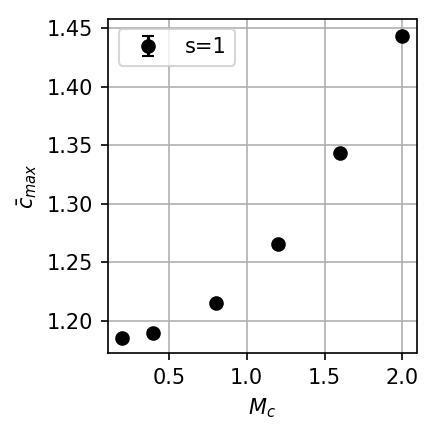

In [16]:
cbar = {
0.2:[1.18517213417,8.28316005859e-05],
0.4:[1.18993010216,0.00216046672833],
0.8:[1.21488040218,0.000434722017994],
1.2:[1.26528497121,0.00169770428284],
1.6:[1.3438352086,0.00140748190739],
2.0:[1.44367494524,0.00179705361569],
}

def plotter(dat,label,fmt):
    plt.errorbar(dat.keys(),[x[0] for x in dat.values()], yerr=[x[1] for x in dat.values()],fmt=fmt,label=label,capsize=3)
    
fig = plt.figure(figsize=(3,3),dpi=150)
plotter(cbar,'s=1','ko')

plt.grid(True)
plt.xlabel(r'$M_c$')
plt.ylabel(r'$\bar{c}_{max}$')
# plt.ylim([0.1,0.4])
plt.tight_layout()
plt.legend()